In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('Data/vivino.csv', encoding='latin-1')
df.head()

,Unnamed: 0,wine_name,wine_year,wine_country,wine_region,winery,wine_rating,n_ratings,wine_price
0,1,Merlot,2019,United States,California,Crane Lake,3.6,30,4.99
1,2,Cabernet Sauvignon,2011,United States,Columbia Valley,Hogue,3.3,76,4.95
2,3,Hot To Trot Smooth Red Blend,2013,United States,Columbia Valley,14 Hands,3.7,3917,4.99
3,4,Cabernet Sauvignon,2010,Chile,Maule Valley,Aromo,3.0,189,4.99
4,5,Loggia del Conte Chianti,2016,Italy,Chianti,Le Chiantigiane,3.3,149,4.99


In [3]:
# Data cleaning

# Drop columns
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,wine_name,wine_year,wine_country,wine_region,winery,wine_rating,n_ratings,wine_price
0,Merlot,2019,United States,California,Crane Lake,3.6,30,4.99
1,Cabernet Sauvignon,2011,United States,Columbia Valley,Hogue,3.3,76,4.95
2,Hot To Trot Smooth Red Blend,2013,United States,Columbia Valley,14 Hands,3.7,3917,4.99
3,Cabernet Sauvignon,2010,Chile,Maule Valley,Aromo,3.0,189,4.99
4,Loggia del Conte Chianti,2016,Italy,Chianti,Le Chiantigiane,3.3,149,4.99


In [5]:
# Data columns name
# wine_name	wine_year,	wine_country,	wine_region	winery,	wine_rating	n_ratings,	wine_price

# CART REGRESSION for wine_rating

# Split data into train and test

from sklearn.model_selection import train_test_split

X = df.drop(['wine_rating'], axis=1)

y = df['wine_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Make dataset String to Numeric

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_train['wine_name'] = le.fit_transform(X_train['wine_name'])
X_train['wine_country'] = le.fit_transform(X_train['wine_country'])
X_train['wine_region'] = le.fit_transform(X_train['wine_region'])
X_train['winery'] = le.fit_transform(X_train['winery'])

X_test['wine_name'] = le.fit_transform(X_test['wine_name'])
X_test['wine_country'] = le.fit_transform(X_test['wine_country'])
X_test['wine_region'] = le.fit_transform(X_test['wine_region'])
X_test['winery'] = le.fit_transform(X_test['winery'])

# y_train = le.fit_transform(y_train)
# y_test = le.fit_transform(y_test)

# CART REGRESSION
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

# Prediction and Evaluation
predictions = dtree.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))


MAE:  0.22083467094703046
MSE:  0.08371428571428567
RMSE:  0.2893342111024648


In [6]:
X_test.head()

,wine_name,wine_year,wine_country,wine_region,winery,n_ratings,wine_price
5372,224,2014,9,57,86,890,18.99
6996,1315,2019,29,420,1828,46,22.99
5653,1769,2018,29,75,712,154,19.99
8895,1038,2016,29,119,997,47,26.99
1066,392,2019,15,449,159,1009,9.99


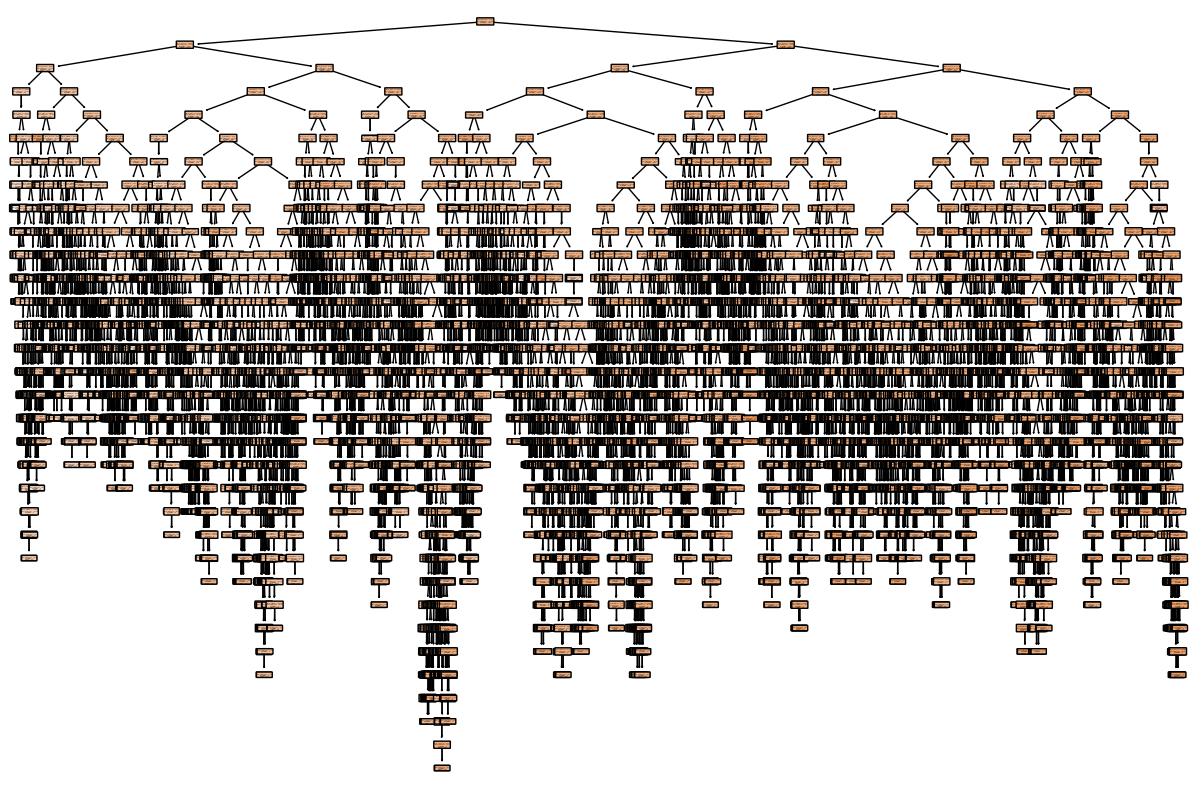

In [7]:
from sklearn import tree

# 분할 기준, 불순도, 샘플 수, 클래스 값 분포
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled=True, rounded=True, feature_names=X_train.columns)
plt.show()

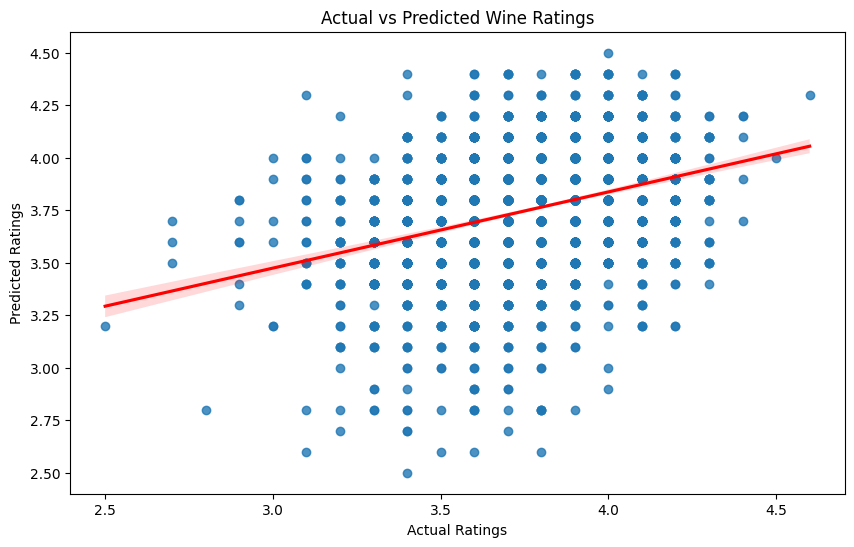

In [8]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=predictions, line_kws={"color": "red"})
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Wine Ratings')
plt.show()

In [9]:
# 테스트용 와인 데이터를 하나 선택해서 실제와 예측값 비교

# 실제값
X_test.iloc[0]
y_test.iloc[0]
# 예측값
predictions[0]

# 비교하기
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
comparison.head(10)

,Actual,Predicted
5372,3.7,3.9
6996,4.0,4.2
5653,3.8,3.7
8895,3.4,3.8
1066,3.6,3.5
7057,4.0,4.0
6942,3.6,3.8
4768,3.5,3.8
1825,3.4,3.4
1589,3.6,3.7


In [90]:
# 와인 브랜드, 품종이 아닌 성분들로만 CART REGRESSION 해보기

# Load data

df1 = pd.read_csv('Data/cleansingWine.csv')
df1.head()

C:\Users\dolon\AppData\Local\Temp\ipykernel_20964\111192229.py:5: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Data/cleansingWine.csv')


,Unnamed: 0,id,name,producer,nation,local1,local2,local3,local4,varieties1,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,0,137197,Altair,Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750
1,1,137198,"Altair, Sideral",Altair,Chile,Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750
2,2,137199,Baron du Val Red,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0,0,750
3,3,137200,Baron du Val White,Baron du Val,France,NaN,NaN,NaN,NaN,Carignan,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0,0,750
4,4,137201,"Benziger, Cabernet Sauvignon",Benziger,USA,California,NaN,NaN,NaN,Cabernet Sauvignon,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0,2003,750


In [91]:
# Print columns name
df1.columns

Index(['Unnamed: 0', 'id', 'name', 'producer', 'nation', 'local1', 'local2',
       'local3', 'local4', 'varieties1', 'varieties2', 'varieties3',
       'varieties4', 'varieties5', 'varieties6', 'varieties7', 'varieties8',
       'varieties9', 'varieties10', 'varieties11', 'varieties12', 'type',
       'use', 'abv', 'degree', 'sweet', 'acidity', 'body', 'tannin', 'price',
       'year', 'ml'],
      dtype='object')

In [92]:
cols_to_drop = df1.columns[df1.columns.get_loc('Unnamed: 0'):df1.columns.get_loc('use')+1]
df1.drop(cols_to_drop, axis=1, inplace=True)
df1.drop(['year', 'ml'], axis=1, inplace=True)
df1.head()

,abv,degree,sweet,acidity,body,tannin,price
0,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000
1,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000
2,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0
3,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0
4,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0


In [93]:
df1.dtypes

abv        object
degree     object
sweet      object
acidity    object
body       object
tannin     object
price       int64
dtype: object

In [94]:
# Normalize abv collum data likes '14~15' to '14'
df1['abv'] = df1['abv'].str.split('~').str[0]
df1.head()

,abv,degree,sweet,acidity,body,tannin,price
0,14,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000
1,14,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000
2,11,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,0
3,11,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,0
4,13,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,0


In [95]:
df1['degree'] = df1['degree'].str.split('~').str[0]
df1.head()

,abv,degree,sweet,acidity,body,tannin,price
0,14,17,SWEET1,ACIDITY4,BODY5,TANNIN4,220000
1,14,16,SWEET1,ACIDITY3,BODY4,TANNIN4,110000
2,11,15,SWEET2,ACIDITY3,BODY2,TANNIN2,0
3,11,9,SWEET1,ACIDITY3,BODY2,TANNIN1,0
4,13,17,SWEET1,ACIDITY3,BODY3,TANNIN4,0


In [96]:
# Normalize sweet collum data likes 'SWEET1' to '1'
df1['sweet'] = df1['sweet'].str.split('SWEET').str[1]
df1.head()

,abv,degree,sweet,acidity,body,tannin,price
0,14,17,1,ACIDITY4,BODY5,TANNIN4,220000
1,14,16,1,ACIDITY3,BODY4,TANNIN4,110000
2,11,15,2,ACIDITY3,BODY2,TANNIN2,0
3,11,9,1,ACIDITY3,BODY2,TANNIN1,0
4,13,17,1,ACIDITY3,BODY3,TANNIN4,0


In [97]:
df1['acidity'] = df1['acidity'].str.split('ACIDITY').str[1]
df1.head()

,abv,degree,sweet,acidity,body,tannin,price
0,14,17,1,4,BODY5,TANNIN4,220000
1,14,16,1,3,BODY4,TANNIN4,110000
2,11,15,2,3,BODY2,TANNIN2,0
3,11,9,1,3,BODY2,TANNIN1,0
4,13,17,1,3,BODY3,TANNIN4,0


In [98]:
df1['body'] = df1['body'].str.split('BODY').str[1]
df1.head()

,abv,degree,sweet,acidity,body,tannin,price
0,14,17,1,4,5,TANNIN4,220000
1,14,16,1,3,4,TANNIN4,110000
2,11,15,2,3,2,TANNIN2,0
3,11,9,1,3,2,TANNIN1,0
4,13,17,1,3,3,TANNIN4,0


In [99]:
df1['tannin'] = df1['tannin'].str.split('TANNIN').str[1]
df1.head()

,abv,degree,sweet,acidity,body,tannin,price
0,14,17,1,4,5,4,220000
1,14,16,1,3,4,4,110000
2,11,15,2,3,2,2,0
3,11,9,1,3,2,1,0
4,13,17,1,3,3,4,0


In [100]:
# Find price data that has 0 value
df1[df1['price'] == 0]

,abv,degree,sweet,acidity,body,tannin,price
2,11,15,2,3,2,2,0
3,11,9,1,3,2,1,0
4,13,17,1,3,3,4,0
5,12,13,2,4,2,2,0
6,13,17,1,3,4,3,0
...,...,...,...,...,...,...,...
21592,12,10,1,4,2,1,0
21593,19,14,5,3,5,3,0
21594,12,16,1,3,3,3,0
21595,12,10,1,3,2,1,0


In [101]:
# Drop price data that has 0 value
df1 = df1[df1['price'] != 0]

In [102]:
df1.head(), df1.shape  

(    abv degree sweet acidity body tannin   price
 0    14     17     1       4    5      4  220000
 1    14     16     1       3    4      4  110000
 7    13     16     1       3    2      3   21000
 8  11.5      9     1       4    2      1   21000
 9    13     16     1       3    2      3   19000,
 (12512, 7))

In [103]:
df1.isnull().sum() 

abv        4055
degree     4056
sweet         2
acidity       0
body          0
tannin        0
price         0
dtype: int64

In [104]:
df1.dropna(inplace=True)

In [105]:
df1.isnull().sum(), df1.shape, df1.dtypes

(abv        0
 degree     0
 sweet      0
 acidity    0
 body       0
 tannin     0
 price      0
 dtype: int64,
 (8454, 7),
 abv        object
 degree     object
 sweet      object
 acidity    object
 body       object
 tannin     object
 price       int64
 dtype: object)

In [106]:
df1.head()

,abv,degree,sweet,acidity,body,tannin,price
0,14,17,1,4,5,4,220000
1,14,16,1,3,4,4,110000
7,13,16,1,3,2,3,21000
8,11.5,9,1,4,2,1,21000
9,13,16,1,3,2,3,19000


In [107]:
# Change data type to int
df1['abv'] = df1['abv'].astype(float)
df1['degree'] = df1['degree'].astype(int)
df1['sweet'] = df1['sweet'].astype(int)
df1['acidity'] = df1['acidity'].astype(int)
df1['body'] = df1['body'].astype(int)
df1['tannin'] = df1['tannin'].astype(int)
df1['price'] = df1['price'].astype(int)

In [108]:
# Normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1[['abv', 'degree', 'sweet', 'acidity', 'body', 'tannin', 'price']] = scaler.fit_transform(df1[['abv', 'degree', 'sweet', 'acidity', 'body', 'tannin', 'price']]) 

df1.head()

,abv,degree,sweet,acidity,body,tannin,price
0,0.273649,0.971781,-0.349302,0.883379,1.760460,1.130308,0.388040
1,0.273649,0.710766,-0.349302,-0.387352,0.671332,1.130308,-0.083799
7,-0.057112,0.710766,-0.349302,-0.387352,-1.506923,0.355695,-0.465560
8,-0.553254,-1.116336,-0.349302,0.883379,-1.506923,-1.193530,-0.465560
9,-0.057112,0.710766,-0.349302,-0.387352,-1.506923,0.355695,-0.474138


In [109]:
# Regression
# Split data into train and test
from sklearn.model_selection import train_test_split

X = df1.drop(['price'], axis=1)
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [110]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# Print the intercept
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df


-0.0028195446367382886


,Coefficient
abv,0.058804
degree,-0.111131
sweet,0.043015
acidity,0.218777
body,0.242823
tannin,0.089679


In [111]:
# Prediction and Evaluation
predictions = lm.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))

MAE:  0.42161191490885214
MSE:  0.7593274580983974
RMSE:  0.8713939741003477


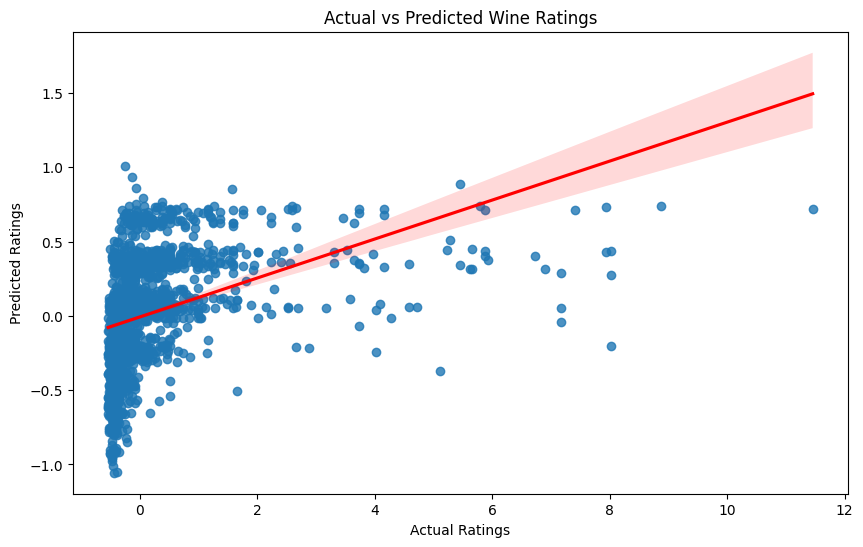

In [112]:
# Draw graph

plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=predictions, line_kws={"color": "red"})
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Wine Ratings')
plt.show()